In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

In [4]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [7]:
file_name="laptops.csv"
download(file_path, file_name)


In [8]:
df= pd.read_csv(file_name, header = 0)

In [9]:
df.head()


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [13]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [17]:
missing = df.isnull()
print (missing.head())

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  


In [19]:
for column in missing.columns.values.tolist():
    print(column)
    print(missing[column].value_counts())
    print ("")

Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



In [21]:
avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
df['Weight_kg']=df['Weight_kg'].fillna(avg_weight)

In [23]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"] = df["Screen_Size_cm"].fillna(common_screen_size)

In [25]:
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")

In [27]:
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

In [29]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [31]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'Price bins')

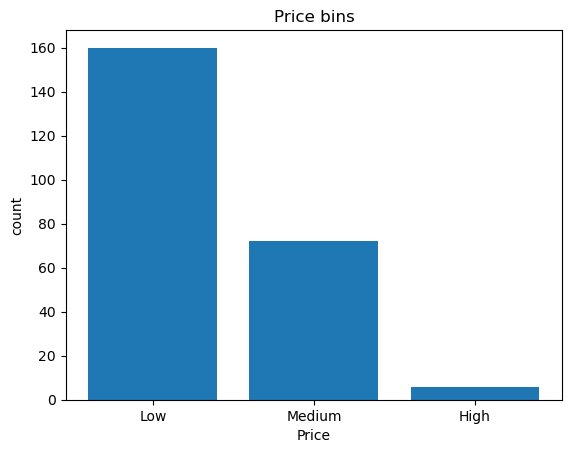

In [33]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

In [35]:
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)


df.drop("Screen", axis = 1, inplace=True)

In [37]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  \
0           0         Acer         4    2   1         5         14.000000   
1           1         Dell         3    1   1         3         15.598425   
2           2         Dell         3    1   1         7         15.598425   
3           3         Dell         4    2   1         5         13.299213   
4           4           HP         4    2   1         7         15.598425   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  Price Price-binned  \
0       0.551724       8             256        3.52800    978          Low   
1       0.689655       4             256        4.85100    634          Low   
2       0.931034       8             256        4.85100    946          Low   
3       0.551724       8             128        2.69010   1244          Low   
4       0.620690       8             256        4.21155    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
0           False       

(0.0, 3974.15)

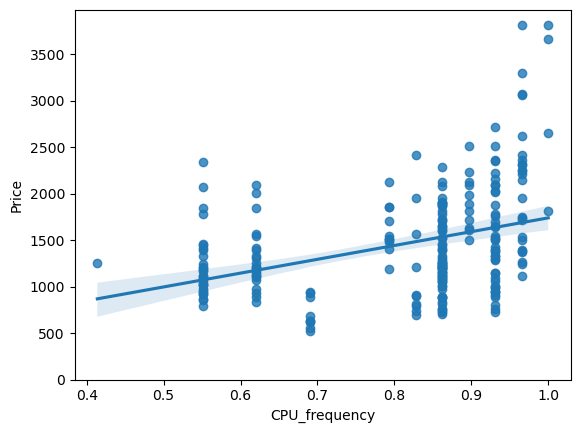

In [39]:
sns.regplot(x = "CPU_frequency", y = "Price", data = df)
plt.ylim(0,)

(0.0, 3974.15)

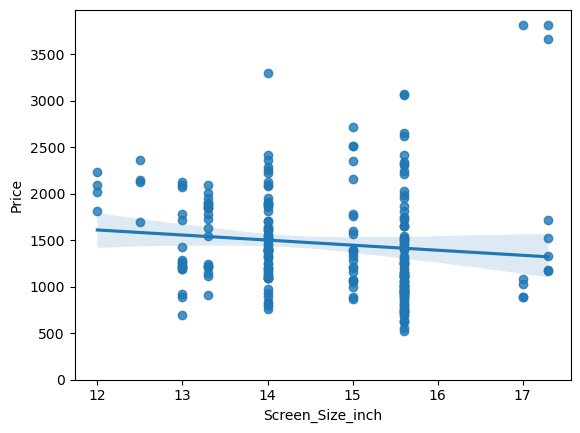

In [41]:
sns.regplot(x = "Screen_Size_inch", y = "Price", data = df)
plt.ylim(0,)

(0.0, 3974.15)

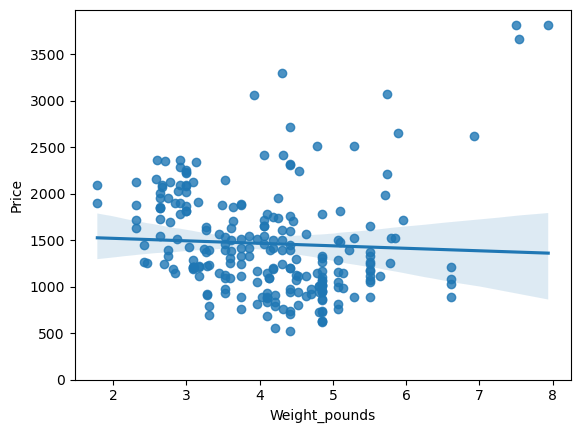

In [43]:
sns.regplot(x = "Weight_pounds", y = "Price", data = df)
plt.ylim(0,)

In [45]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110565
Price                    -0.110565  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


<Axes: xlabel='Category', ylabel='Price'>

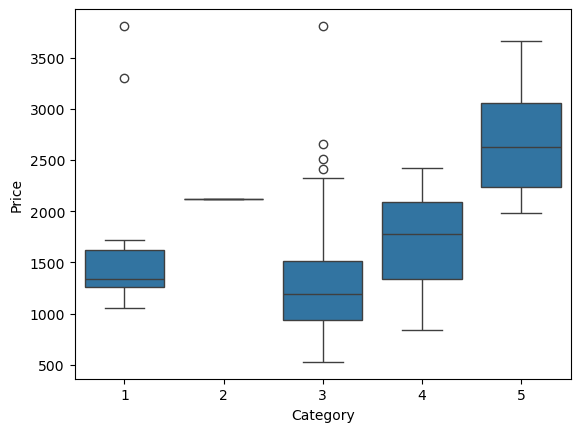

In [47]:
sns.boxplot(x='Category', y = 'Price', data=df)

<Axes: xlabel='GPU', ylabel='Price'>

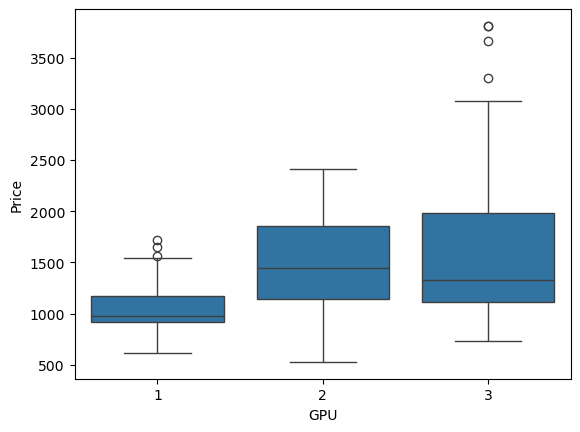

In [48]:
sns.boxplot(x='GPU', y = 'Price', data=df)

<Axes: xlabel='OS', ylabel='Price'>

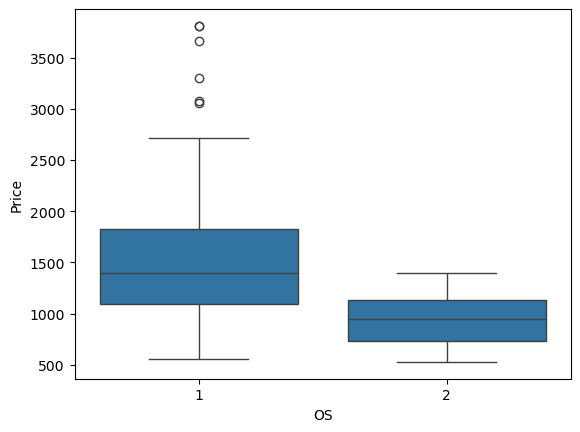

In [51]:
sns.boxplot(x='OS', y = 'Price', data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

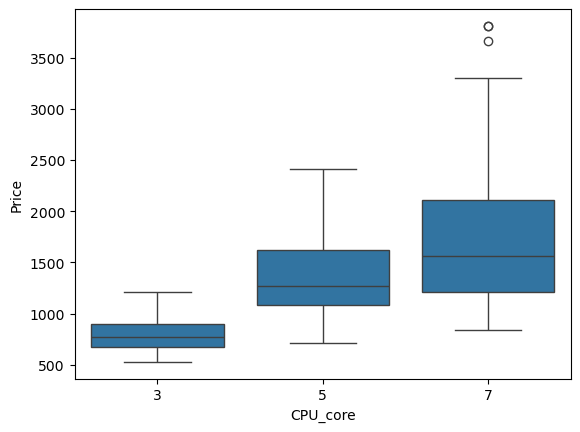

In [53]:
sns.boxplot(x='CPU_core', y = 'Price', data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

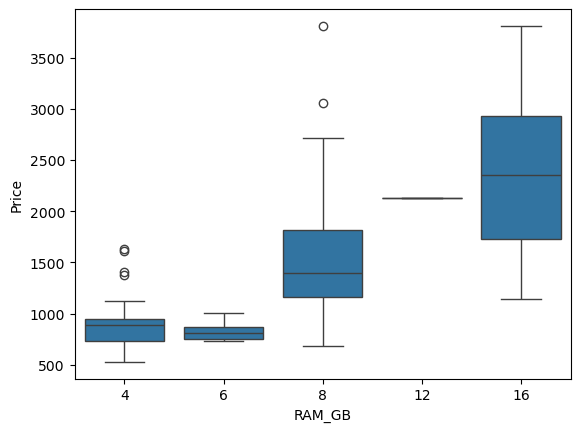

In [55]:
sns.boxplot(x='RAM_GB', y = 'Price', data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

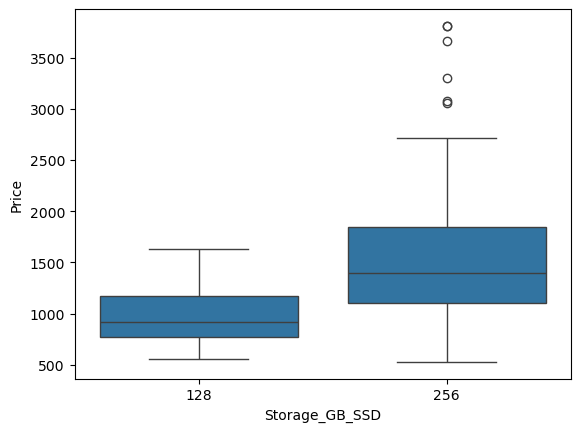

In [57]:
sns.boxplot(x='Storage_GB_SSD', y = 'Price', data=df)

In [59]:
df.describe()

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,14.687951,0.813822,7.882353,245.781513,4.106221,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,1.165589,0.141860,2.482603,34.765316,1.078442,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,15.598425,0.931034,8.000000,256.000000,4.851000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,17.299213,1.000000,16.000000,256.000000,7.938000,3810.000000


In [61]:
df.describe(include = 'all')

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238,238
unique,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,2
top,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,True,False
freq,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,161,161
mean,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.687951,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,NaN,NaN
std,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.165589,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,NaN,NaN
min,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,NaN,NaN
25%,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,NaN,NaN
50%,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,NaN,NaN
75%,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.598425,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,NaN,NaN


In [63]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'], as_index = False).mean()
print (grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [65]:
grouped_pivot = grouped_test1.pivot(index = 'GPU', columns = 'CPU_core')

In [67]:
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


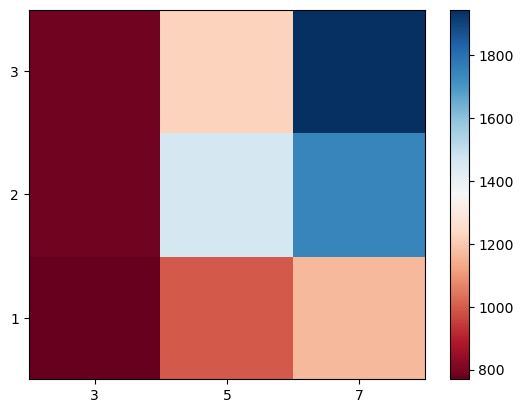

In [69]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor= False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor= False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

In [71]:
for param in ['RAM_GB' , 'CPU_frequency', 'Storage_GB_SSD', 'Screen_Size_inch', 'Weight_pounds', 'CPU_core', 'OS', 'GPU', 'Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print (param)
    print('Pearson corr coeff for', param, 'is', pearson_coef, 'with p value of', p_value)

RAM_GB
Pearson corr coeff for RAM_GB is 0.5492972971857845 with p value of 3.681560628842711e-20
CPU_frequency
Pearson corr coeff for CPU_frequency is 0.36666555892588615 with p value of 5.502463350713296e-09
Storage_GB_SSD
Pearson corr coeff for Storage_GB_SSD is 0.2434207552181029 with p value of 0.00014898923191724174
Screen_Size_inch
Pearson corr coeff for Screen_Size_inch is -0.11056471275425059 with p value of 0.08876456732700777
Weight_pounds
Pearson corr coeff for Weight_pounds is -0.050312258377515504 with p value of 0.43976938534338944
CPU_core
Pearson corr coeff for CPU_core is 0.4593977773355117 with p value of 7.912950127009034e-14
OS
Pearson corr coeff for OS is -0.22172980114827376 with p value of 0.0005696642559246749
GPU
Pearson corr coeff for GPU is 0.28829819888814273 with p value of 6.166949698364282e-06
Category
Pearson corr coeff for Category is 0.28624275581264114 with p value of 7.225696235806862e-06


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category = UserWarning)

In [74]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


In [77]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df[["Price"]]

lm.fit(X,Y)


LinearRegression()

In [79]:
Yhat = lm.predict(X)

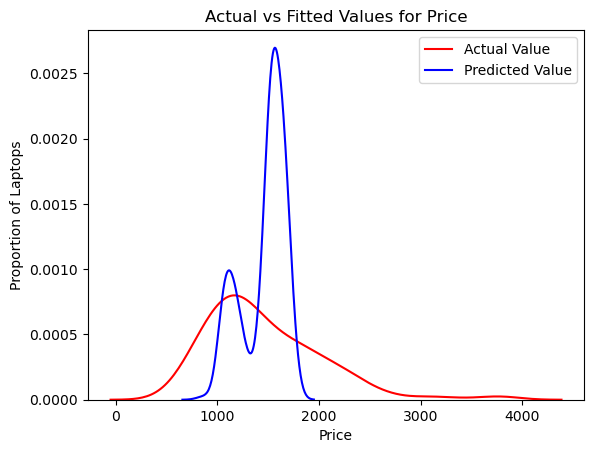

In [81]:
ax1 = sns.distplot(df['Price'], hist = False , color = "r" , label = "Actual Value")

sns.distplot(Yhat, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [83]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = r2_score(Y, Yhat)
print ('Rsq for slr is : ', r2_score_slr)
print ('MSE for slr is : ', mse_slr)

Rsq for slr is :  0.1344436321024326
MSE for slr is :  284583.4405868629


In [85]:
lm1 = LinearRegression()
Z =  df[['CPU_frequency' , 'RAM_GB' , 'Storage_GB_SSD' , 'CPU_core' , 'GPU' , 'Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)

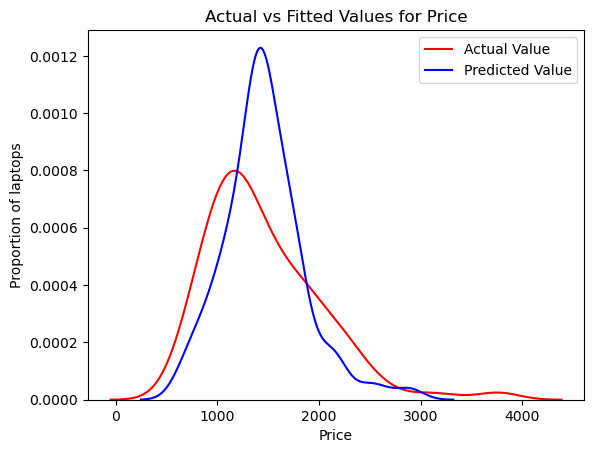

In [87]:
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [89]:
mse_mlr = mean_squared_error(df['Price'], Y_hat)
r2_score_mlr = r2_score(Y,Y_hat)
print ('Rsq for slr is : ', r2_score_mlr)
print ('MSE for slr is : ', mse_mlr)

Rsq for slr is :  0.4794820074485613
MSE for slr is :  171139.404320327


In [91]:
X = X.to_numpy().flatten()
Y = Y.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [93]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

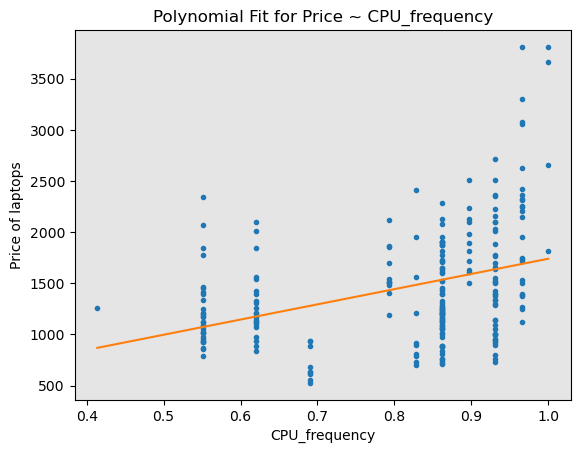

In [95]:
PlotPolly(p1, X, Y, 'CPU_frequency')

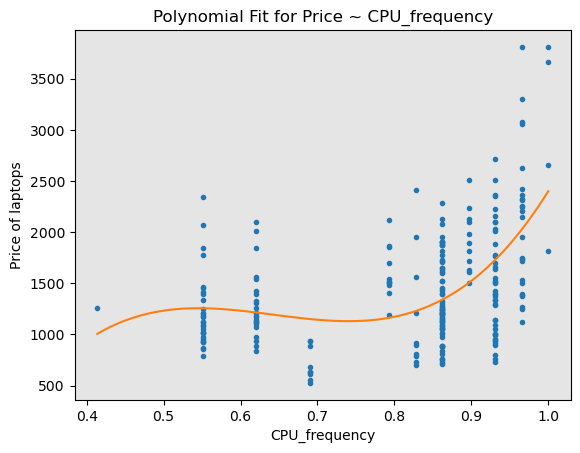

In [97]:
PlotPolly(p3, X, Y, 'CPU_frequency')

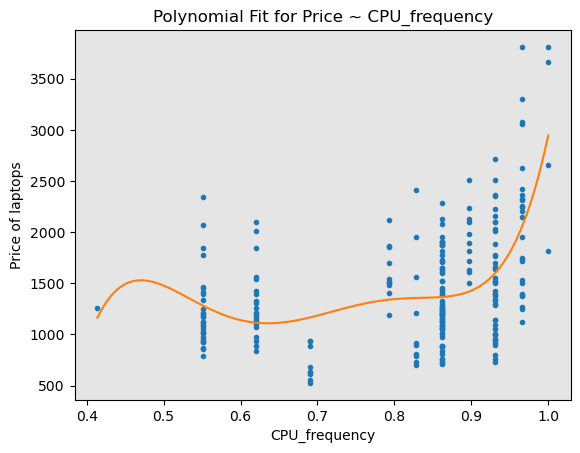

In [99]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [101]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.2669264079653101
The MSE value for 3rd degree polynomial is:  241024.86303848805
The R-square value for 5th degree polynomial is:  0.3030822706443117
The MSE value for 5th degree polynomial is:  229137.29548056083


In [103]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [105]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  126438.67879885017
R^2 for multi-variable polynomial pipeline is:  0.6154386096491943


In [107]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

## Importing Another Dataset

In [126]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(filepath)

In [127]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [134]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [136]:
print(df.columns)

Index(['Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_inch',
       'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_pounds', 'Price',
       'Price-binned', 'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')


In [140]:
y_data = df['Price']
x_data = df.drop(['Price'], axis = 1)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 1)
print ("number of test samples : ", x_test.shape[0])
print ("number of training samples : ", x_train.shape[0])

number of test samples :  24
number of training samples :  214


In [144]:
lre = LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)
print (lre.score(x_test[['CPU_frequency']], y_test))
print (lre.score(x_train[['CPU_frequency']], y_train))

-0.06599437350393766
0.14829792099817973


In [146]:
Rcross = cross_val_score (lre , x_data[['CPU_frequency']] , y_data, cv = 4)
print ("mean of folds are : ", Rcross.mean(), " and std dev is : ", Rcross.std()) 

mean of folds are :  -0.16109232388595118  and std dev is :  0.3849579786664711


In [148]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

In [150]:
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

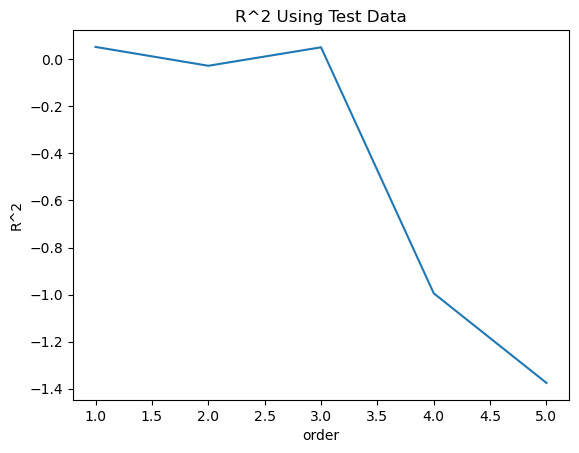

In [152]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [154]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [174]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:07<00:00, 127.14it/s, Test Score=0.423, Train Score=0.669]


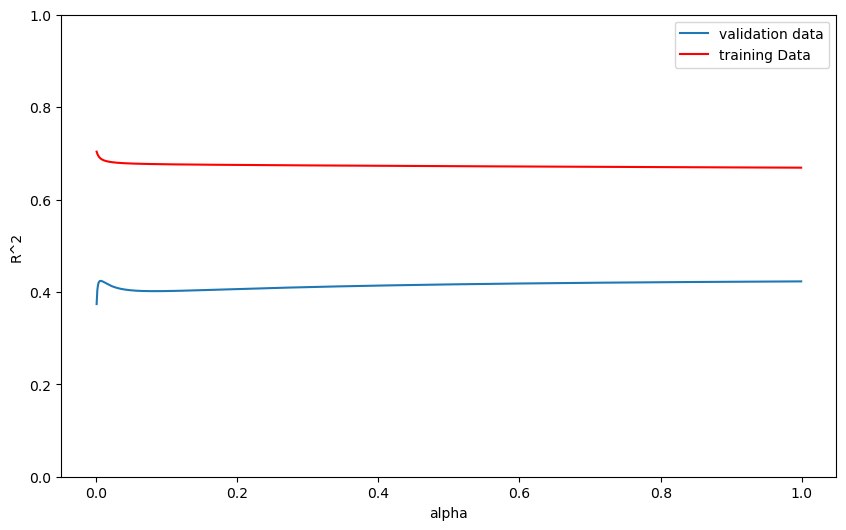

In [175]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [160]:
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

In [162]:
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [164]:
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [166]:
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.3009905048691819


In [168]:
print (BestRR)

Ridge(alpha=10)
